In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from ml_lib import GaussianMixture as GaussianMixtureFromTemu
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [3]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

cgm = GaussianMixtureFromTemu(n_components=4)

y_pred_ = cgm.fit_predict(X)

print(adjusted_rand_score(y, y_pred_))

1.0


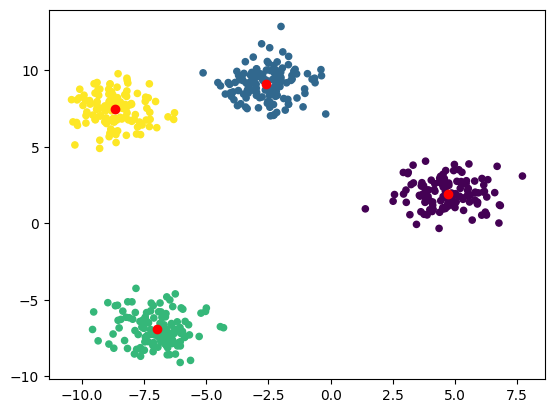

In [4]:
plt.scatter(*X.T, c=y_pred_, s=20)
plt.scatter(*cgm._means.T, c="red")

In [5]:
X_new, y_new = cgm.sample(6)
print(X_new)
print(y_new)

[[-2.69744765  7.65418426]
 [-8.06984571  7.4215346 ]
 [-2.46391134 10.11181119]
 [-8.36818165  7.11489501]
 [-9.13984061 -4.47841444]
 [-7.55326781 -7.69345795]]
[1 3 1 3 2 2]


In [6]:
cgm.score_samples(X_new)

array([-4.16751666, -3.33483299, -3.67956649, -3.20027929, -8.0363974 ,
       -3.71860945])

In [7]:
densities = cgm.score_samples(X)
density_threshold = np.percentile(densities, 4)
outliers = X[densities < density_threshold]

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_8764\2547139702.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cgm._means[:, 0], cgm._means[:, 1], marker='x', s=200, color='white', edgecolors='k', linewidth=2)


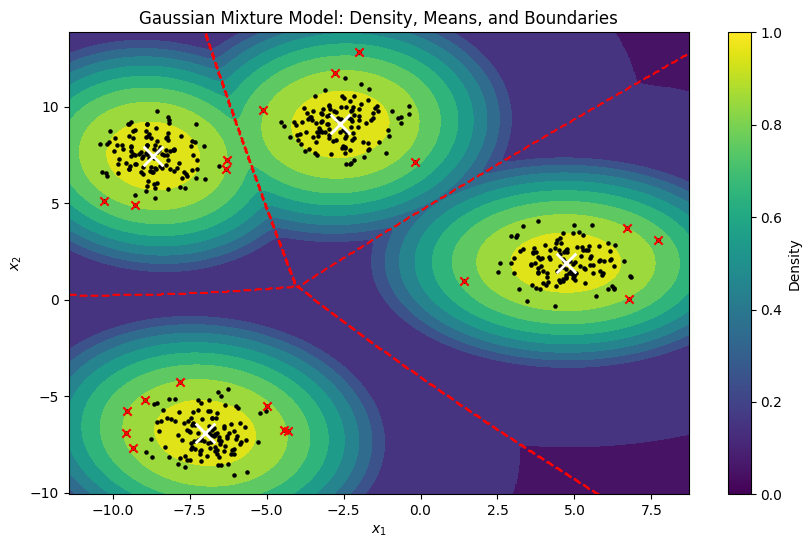

In [8]:
# Create a meshgrid over the data
x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)
y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
Xgrid, Ygrid = np.meshgrid(x, y)
grid = np.c_[Xgrid.ravel(), Ygrid.ravel()]


# Compute GMM density over the grid
log_density = cgm.score_samples(grid)
density = np.exp(log_density).reshape(Xgrid.shape)


# Predict the component with the highest posterior
Z = cgm.predict(grid).reshape(Xgrid.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(Xgrid, Ygrid, density, levels=20, cmap="viridis", norm=LogNorm())
plt.scatter(X[:, 0], X[:, 1], s=5, color='k')

# Plot decision boundaries
plt.contour(Xgrid, Ygrid, Z, levels=np.arange(cgm._n_components + 1) - 0.5, colors='r', linestyles='dashed')

# Plot GMM means
plt.scatter(cgm._means[:, 0], cgm._means[:, 1], marker='x', s=200, color='white', edgecolors='k', linewidth=2)

plt.scatter(*outliers.T, c='red', marker='x')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gaussian Mixture Model: Density, Means, and Boundaries')
plt.colorbar(label='Density')
plt.show()


In [9]:
print(cgm._log_likelihood)

-2080.9961520968054
